Importing the required packages

In [5]:
import numpy as np
import pandas as pd

Import the data

In [6]:
df_train = pd.read_csv('text_emotion.csv')
df_train.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [7]:
from io import StringIO

col = ['sentiment', 'content']
df_train = df_train[col]
df_train = df_train[pd.notnull(df_train['content'])]
df_train.columns = ['sentiment', 'content']

df_train['category_id'] = df_train['sentiment'].factorize()[0]

category_id_df_train = df_train[['sentiment', 'category_id']].drop_duplicates().sort_values('category_id')

category_to_id = dict(category_id_df_train.values)

id_to_category = dict(category_id_df_train[['category_id', 'sentiment']].values)

df_train.head()

,sentiment,content,category_id
0,empty,@tiffanylue i know i was listenin to bad habi...,0
1,sadness,Layin n bed with a headache ughhhh...waitin o...,1
2,sadness,Funeral ceremony...gloomy friday...,1
3,enthusiasm,wants to hang out with friends SOON!,2
4,neutral,@dannycastillo We want to trade with someone w...,3


The data visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

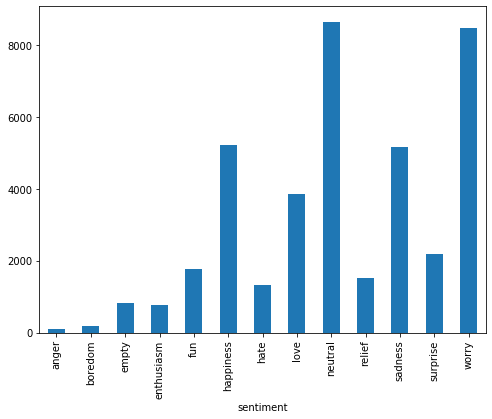

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,6))
df_train.groupby('sentiment').content.count().plot.bar(ylim = 0)

plt.show()

Create a new column called "text length" which is the number of words in the text column.

In [12]:
df_train['text length']=df_train['content'].apply(len)

Use FacetGrid from the seaborn library

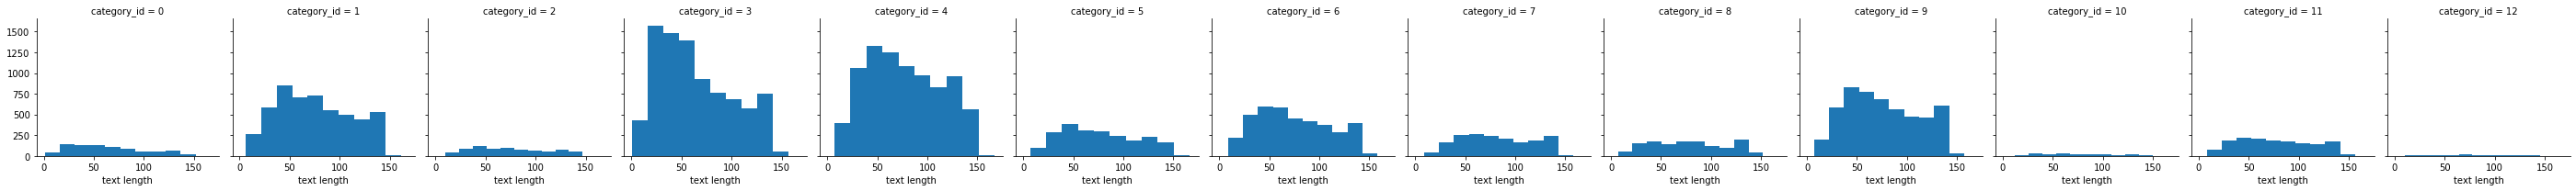

In [13]:
g=sns.FacetGrid(df_train, col='category_id')
g.map(plt.hist,'text length')

Create a boxplot of text length for each category_id.

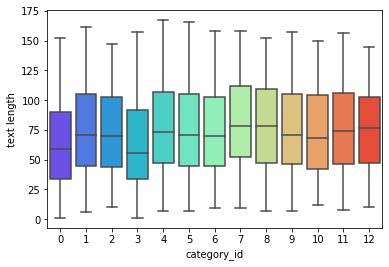

In [14]:
sns.boxplot(x='category_id', y='text length',data=df_train, palette='rainbow')

Natural Language Processing Classification Task

In [15]:
hotel_class=df_train[(df_train.category_id==1)|(df_train.category_id==13)]

Create two objects X and y

In [16]:
X = hotel_class['content']
y = hotel_class['category_id']

create a CountVectorizer object

In [17]:
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer()

Use the fit_transform method

In [18]:
X=cv.fit_transform(X)

split our data into training and testing data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

Training a Model

Import MultinomialNB

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

Now fit nb

In [22]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Predictions and Evaluations

In [23]:
prediction=nb.predict(X_test)

Create a confusion matrix and classification report

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
print(confusion_matrix(y_test,prediction))

[[1550]]


In [26]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1550

    accuracy                           1.00      1550
   macro avg       1.00      1.00      1.00      1550
weighted avg       1.00      1.00      1.00      1550

